In [1]:
library(ggplot2)
library(dplyr)

setwd("/Users/Violet/Test")
clean_df <- read.csv("new_df.csv", stringsAsFactors = FALSE)

attach(clean_df)




Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
colnames(clean_df)

[1] "X"                 "SubjectIDNumLasik" "AgeYrs"           
[4] "GenderTyp"         "RaceUSACat"        "EthnUSACat"       
[7] "LASIKPROWLCohort"  "VisitNoLasik"      "LasikGLCLCLSEScl"

In [3]:
head(clean_df)

X,SubjectIDNumLasik,AgeYrs,GenderTyp,RaceUSACat,EthnUSACat,LASIKPROWLCohort,VisitNoLasik,LasikGLCLCLSEScl
0,1856,24,Male,White,Not Hispanic or Latino,PROWL,0,5
1,824,29,Male,Unknown,Hispanic or Latino,PROWL,0,4
2,1074,21,Male,White,Not Hispanic or Latino,PRWL2,0,5
3,1581,38,Male,White,Not Hispanic or Latino,PROWL,0,4
4,1268,48,Female,White,Not Hispanic or Latino,PRWL2,0,3
5,805,30,Male,Asian,Not Hispanic or Latino,PROWL,0,5


In [15]:
# loop through each demographic variable, and grab the group-value pair within each column
col_header <- colnames(clean_df)
cat_col_header <- c('GenderTyp','RaceUSACat','EthnUSACat','LASIKPROWLCohort')
chart_titles <- c("Gender Type in PROWL @ A Glance", "Race in PROWL @ A Glance", 
                  "Ethnicity in PROWL @ Glance", "Study Corhort in PROWL @ A Glance")
group_value_pair <- c()

for (i in 1:length(col_header)) {
    for (j in 1:length(cat_col_header)) {
        if (col_header[i] == cat_col_header[j]) {
            group_value_pair[[j]] <- clean_df %>% count(clean_df[,i])
        }
    }
}

# plot individual bar chart
bp1 <- ggplot(as.data.frame(group_value_pair[1]), aes(x="", y=as.data.frame(group_value_pair[1])[,2], 
            fill=as.data.frame(group_value_pair[1])[,1])) + geom_bar(width = 1, stat = "identity") + 
            ggtitle(chart_titles[1])
pie1 <- bp1 + coord_polar("y", start=0)
bp2 <- ggplot(as.data.frame(group_value_pair[2]), aes(x="", y=as.data.frame(group_value_pair[2])[,2], 
            fill=as.data.frame(group_value_pair[2])[,1])) + geom_bar(width = 1, stat = "identity") + 
            ggtitle(chart_titles[2])
pie2 <- bp2 + coord_polar("y", start=0)
bp3 <- ggplot(as.data.frame(group_value_pair[3]), aes(x="", y=as.data.frame(group_value_pair[3])[,2], 
            fill=as.data.frame(group_value_pair[3])[,1])) + geom_bar(width = 1, stat = "identity") +
            ggtitle(chart_titles[3])
pie3 <- bp3 + coord_polar("y", start=0)
bp4 <- ggplot(as.data.frame(group_value_pair[4]), aes(x="", y=as.data.frame(group_value_pair[4])[,2], 
            fill=as.data.frame(group_value_pair[4])[,1])) + geom_bar(width = 1, stat = "identity") +
            ggtitle(chart_titles[4])
pie4 <- bp4 + coord_polar("y", start=0)

In [16]:
blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=16, face="bold")
  )

## Demographics  Analytics

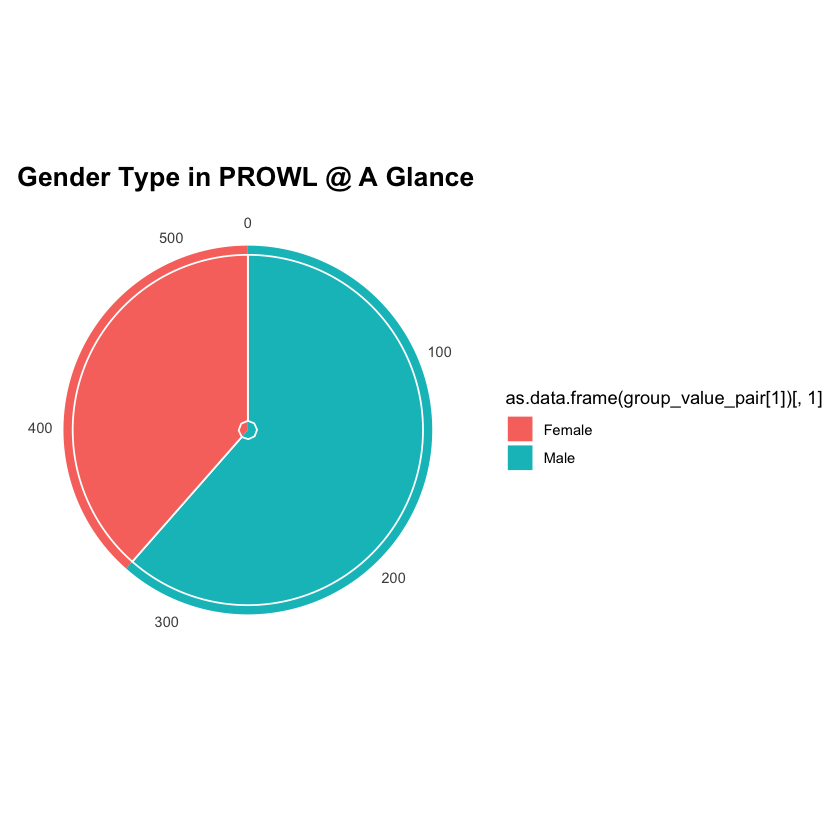

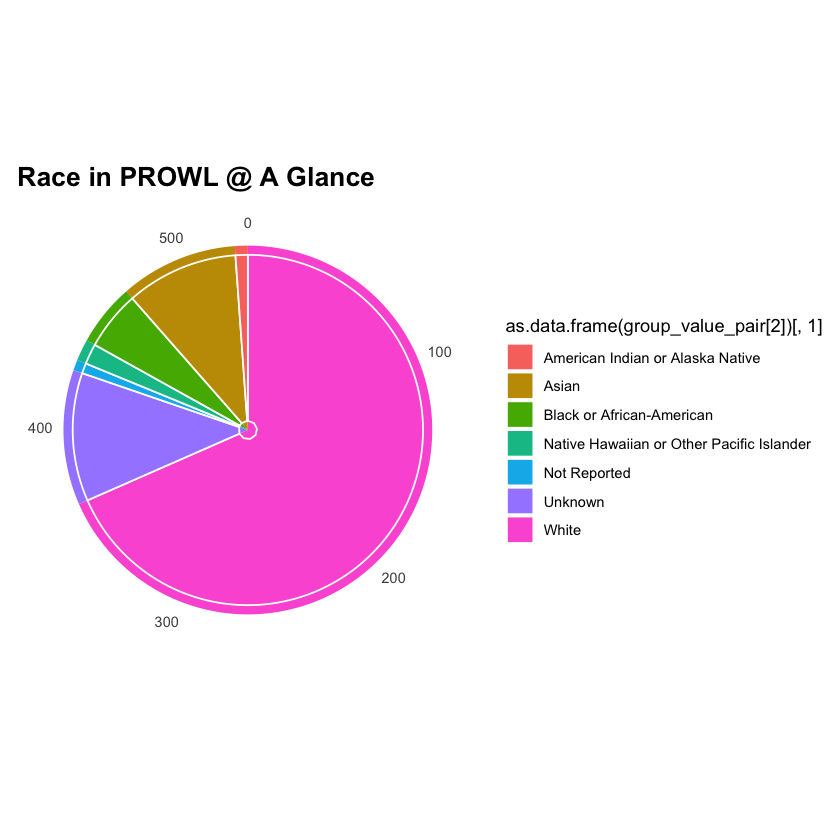

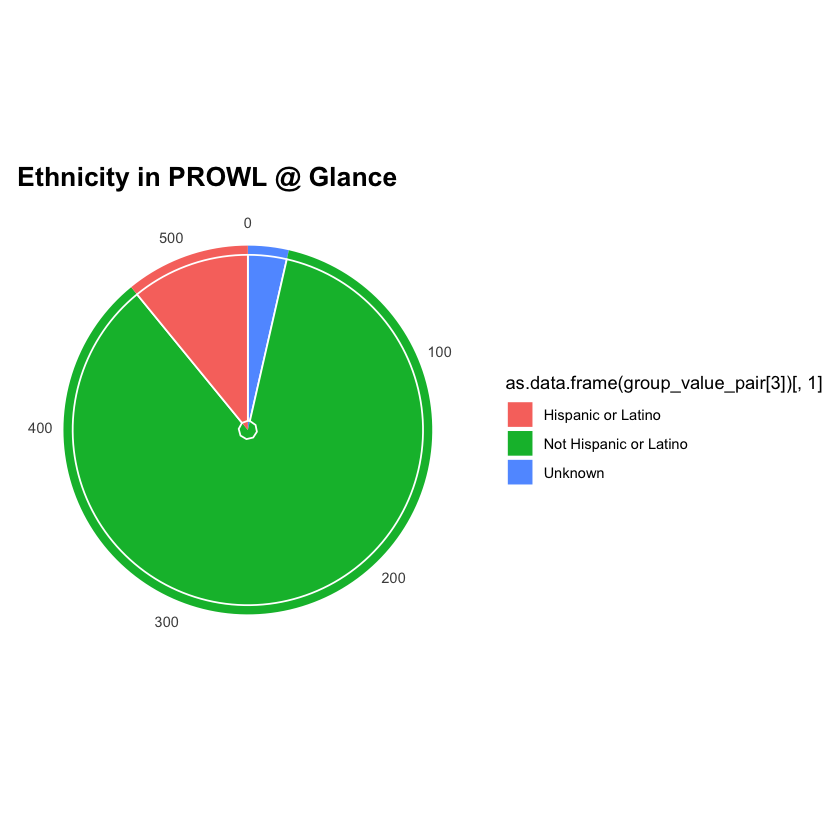

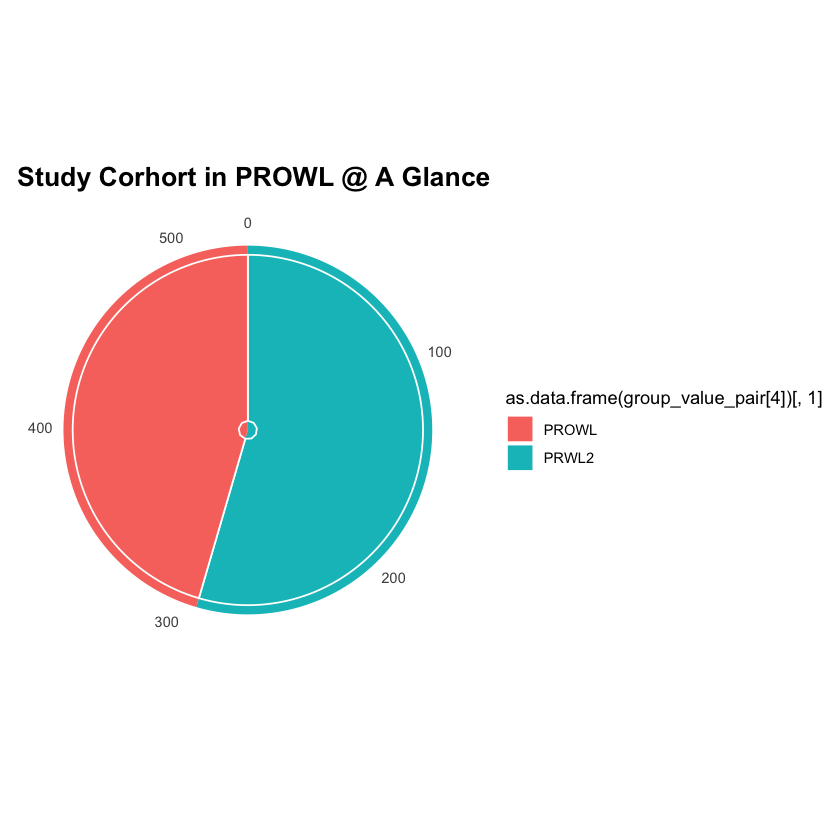

In [17]:
pie1 + blank_theme + geom_bar(stat="identity", color='white') # black border around pie slices
pie2 + blank_theme + geom_bar(stat="identity", color='white') # black border around pie slices
pie3 + blank_theme + geom_bar(stat="identity", color='white') # black border around pie slices
pie4 + blank_theme + geom_bar(stat="identity", color='white') # black border around pie slices
